In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score, silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Load the datasets
customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')
products=pd.read_csv('Products.csv')
# Preview datasets
print(customers.head())
print(transactions.head())

  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue   Price  
0      300.68  300.68  
1      300.68  300.68  
2      300.68  300.68  
3      601.36  300.68  
4      902.04  300.68  


In [4]:
# Merge datasets
merge_data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')


In [5]:
# Feature Engineering
features = merge_data.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'Quantity': 'sum',
    'Region': 'first'
}).reset_index()

# One-hot encode 'Region'
features = pd.get_dummies(features, columns=['Region'], drop_first=True)


In [6]:
# Standardize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features.drop('CustomerID', axis=1))

# Clustering using KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Add cluster labels to the dataset
features['Cluster'] = clusters

# Calculate Clustering Metrics
db_index = davies_bouldin_score(scaled_features, clusters)
silhouette_avg = silhouette_score(scaled_features, clusters)


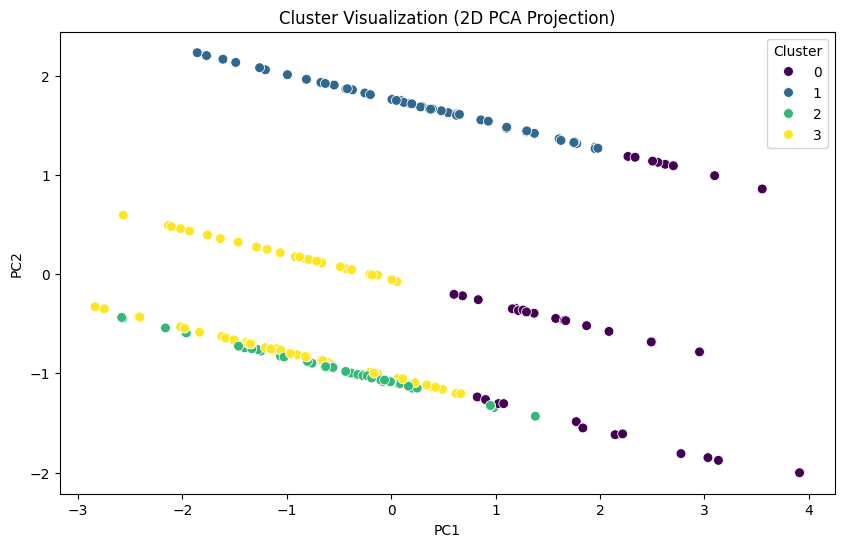

<ipython-input-7-c36f2512b47b>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cluster', data=features, palette='plasma')


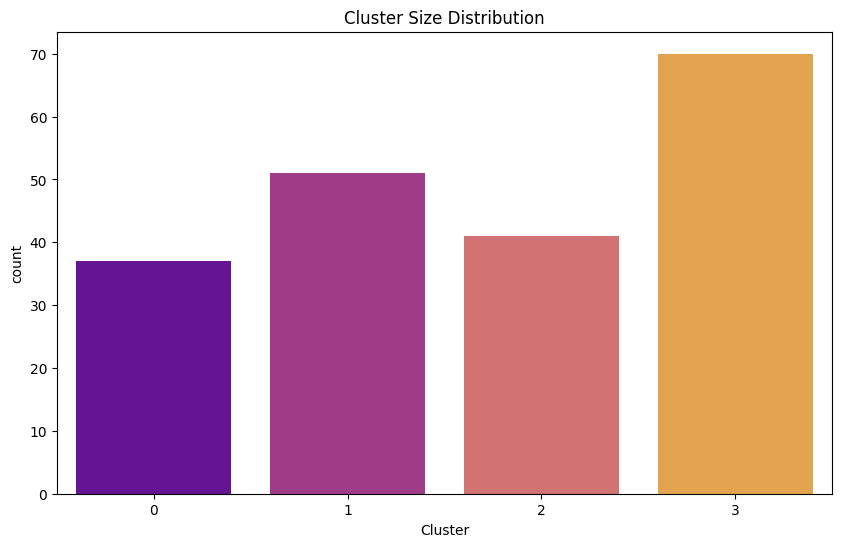

In [7]:
# Visualize Clusters (2D Projection using PCA)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)
reduced_df = pd.DataFrame(reduced_features, columns=['PC1', 'PC2'])
reduced_df['Cluster'] = clusters

plt.figure(figsize=(10, 6))
sns.scatterplot(data=reduced_df, x='PC1', y='PC2', hue='Cluster', palette='viridis', s=50)
plt.title('Cluster Visualization (2D PCA Projection)')
plt.show()

# Visualize Cluster Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Cluster', data=features, palette='plasma')
plt.title('Cluster Size Distribution')
plt.show()
